<a href="https://colab.research.google.com/github/coldsober-irene/ASSIGNMENTS/blob/main/file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
from random import randint
import numpy as np
from math import sqrt
from collections import Counter
from matplotlib import pyplot as plt

In [65]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [66]:
junk_datasets = pd.read_csv('/content/drive/MyDrive/machine vision/winesq.csv')
clean = junk_datasets.dropna()



#convert type into numerical data (1 and 0)

In [67]:
for i in range(len(clean)):
    if clean.iloc[i, 0] == 'white':
        clean.iloc[i,0] = 1
    else:
        clean.iloc[i,0] = 0


#mix data

In [68]:
mixed = []
indices = []
while len(mixed) != len(clean):
    integer = randint(0, len(clean)-1)

    if integer not in indices:
        try:
            mixed.append(list(clean.iloc[integer][:]))
            indices.append(integer)
        except IndexError:
            pass

In [69]:
mixed_df = pd.DataFrame(mixed, columns = list(clean.columns))
# mixed

In [70]:
features = np.array(mixed)[:, 1:]
labels = np.array(mixed)[:, 0]

#draft ----start-----

In [71]:
def euclidean_dist(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2)**2))
  return distance

In [72]:
class KNN:
  def __init__(self, k = 5) -> None:
    self.k = k

  def fit(self, x, y):
    self.x_train = x
    self.y_train = y
    print(len(x_train), len(y_train))

  def predict(self, X):
    predictions = [self._prediction(x) for x in X]
    return predictions

  def _prediction(self, x):
    distances = [euclidean_dist(x, x_train) for x_train in self.x_train]

    # closest k
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common_label = Counter(k_nearest_labels).most_common()
    return most_common_label[0][0]


In [73]:
x_train = features[:int(len(features) * .8)]
x_test = features[int(len(features) * .8):]
y_train = labels[:int(len(labels) * .8)]
y_test = labels[:int(len(labels) * .8)]

In [74]:
classifier = KNN(k = 47)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_train)
print("Prediction: ",predictions)
print(f"y_text: {y_test}")
acc = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {acc}")

5170 5170
Prediction:  [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0

#draft ---end----here---

In [75]:
class pca:
    def __init__(self, df_array) -> None:
        self.df_arr = df_array
        self.standardized_df = []
        self.cols = [str(i) for i in range(len(df_array[0]))]
        # STANDARDIZE DATASET SUCH THAT MEAN WILL BE 0 AND STANDARD DEVIATION BE 1
        self.std_data = self.standadardize_data()
        self.cov_matrix = self.compute_covariance_matrix(self.std_data)

    def pca_chosen(self):
        return self.Compute_principal_components(cov_matrix=self.cov_matrix)

    def standadardize_data(self):
        data_with_mean_0 = self.df_arr - self.df_arr.mean()
        data_with_std_1 = data_with_mean_0 / self.df_arr.std()
        standardized_data = data_with_std_1
        self.standardized_df = pd.DataFrame(standardized_data, columns = self.cols)

        # mean of each feature
        each_feature_mean = self.standardized_df.mean()
        for index, col in enumerate(self.cols):
            self.standardized_df[col] -= each_feature_mean[index]
        return self.standardized_df

    def compute_covariance_matrix(self, standardized_data):
        multiplied = pd.DataFrame()
        for col in self.cols:
            for j, COL in enumerate(self.cols):
                if j != len(self.cols):
                    multiplied[col + " " + self.cols[j]] = standardized_data[col] * standardized_data[self.cols[j]]

        sums = multiplied.sum()
        c = [i for i in range(0, len(sums), len(self.cols))]

        Covariance_matrix = []
        for i, index in enumerate(c):
            try:
                Covariance_matrix.append(list(sums[index:c[i+1]]))
            except IndexError:
                Covariance_matrix.append(list(sums[index:]))

        covariance_df = pd.DataFrame(Covariance_matrix, columns=self.cols, index = self.cols)
        cov_matrix = np.array(Covariance_matrix)
        return cov_matrix

    def Compute_principal_components(self, cov_matrix):
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        eigenvalues_eugenvectors = {eigenvalue:eigenvectors[index] for index, eigenvalue in enumerate(eigenvalues)}
        eigenvalues.sort()

        # CHOOSE ONLY TOP 3 MAXIMUM EIGENVALUES AND GET THEIR EIGENVECTORS
        max_3_eigenvectors = eigenvalues[::-1][:3]
        eigenvectors_of_top_3_eigenvalues = np.array([eigenvalues_eugenvectors[eigen] for eigen in max_3_eigenvectors])

        eigenvectors_of_top_3_eigenvalues = np.transpose(eigenvectors_of_top_3_eigenvalues)
        reduced_dimension_wine_dataset = np.dot(self.df_arr, eigenvectors_of_top_3_eigenvalues)
        pc_df = pd.DataFrame(reduced_dimension_wine_dataset,
                            columns = ['Principal comp1', 'Principal comp2', 'Principal comp3'])
        # p = pc_df
        # dfi.export(pc_df.head(15).style.set_table_styles(), "pca.png", table_conversion="matplotlib")
        return reduced_dimension_wine_dataset, pd.DataFrame(reduced_dimension_wine_dataset,
                                                            columns = ['Principal comp1', 'Principal comp2', 'Principal comp3'])


In [ ]:
pc = pca(df_array=features)
all_pca, df = pc.pca_chosen()
all_pca = np.array(all_pca)


In [77]:
pca_x_train = features[:int(len(all_pca) * .8)]
pca_x_test = features[int(len(all_pca) * .8):]
pca_y_train = labels[:int(len(labels) * .8)]
pca_y_test = labels[:int(len(labels) * .8)]

In [78]:
pca_classifier = KNN(k = 47)
pca_classifier.fit(pca_x_train, pca_y_train)
pca_predictions = pca_classifier.predict(pca_x_train)
print("Prediction: ",pca_predictions)
print(f"y_text: {y_test}")
pca_acc = np.sum(pca_predictions == y_test) / len(y_test)
print(f"Accuracy: {pca_acc}")

5170 5170
Prediction:  [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0

#plot data before pca

#plot pca data

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def plotting(data):
  # Create a DataFrame for easier plotting with Seaborn
  df = pd.DataFrame(data, columns=[str(i) for i in range(len(data[0]))])

  # Create a pair plot
  sns.set(style="ticks")
  sns.pairplot(df, markers='o', diag_kind='kde')

  # Show the plot
  plt.show()


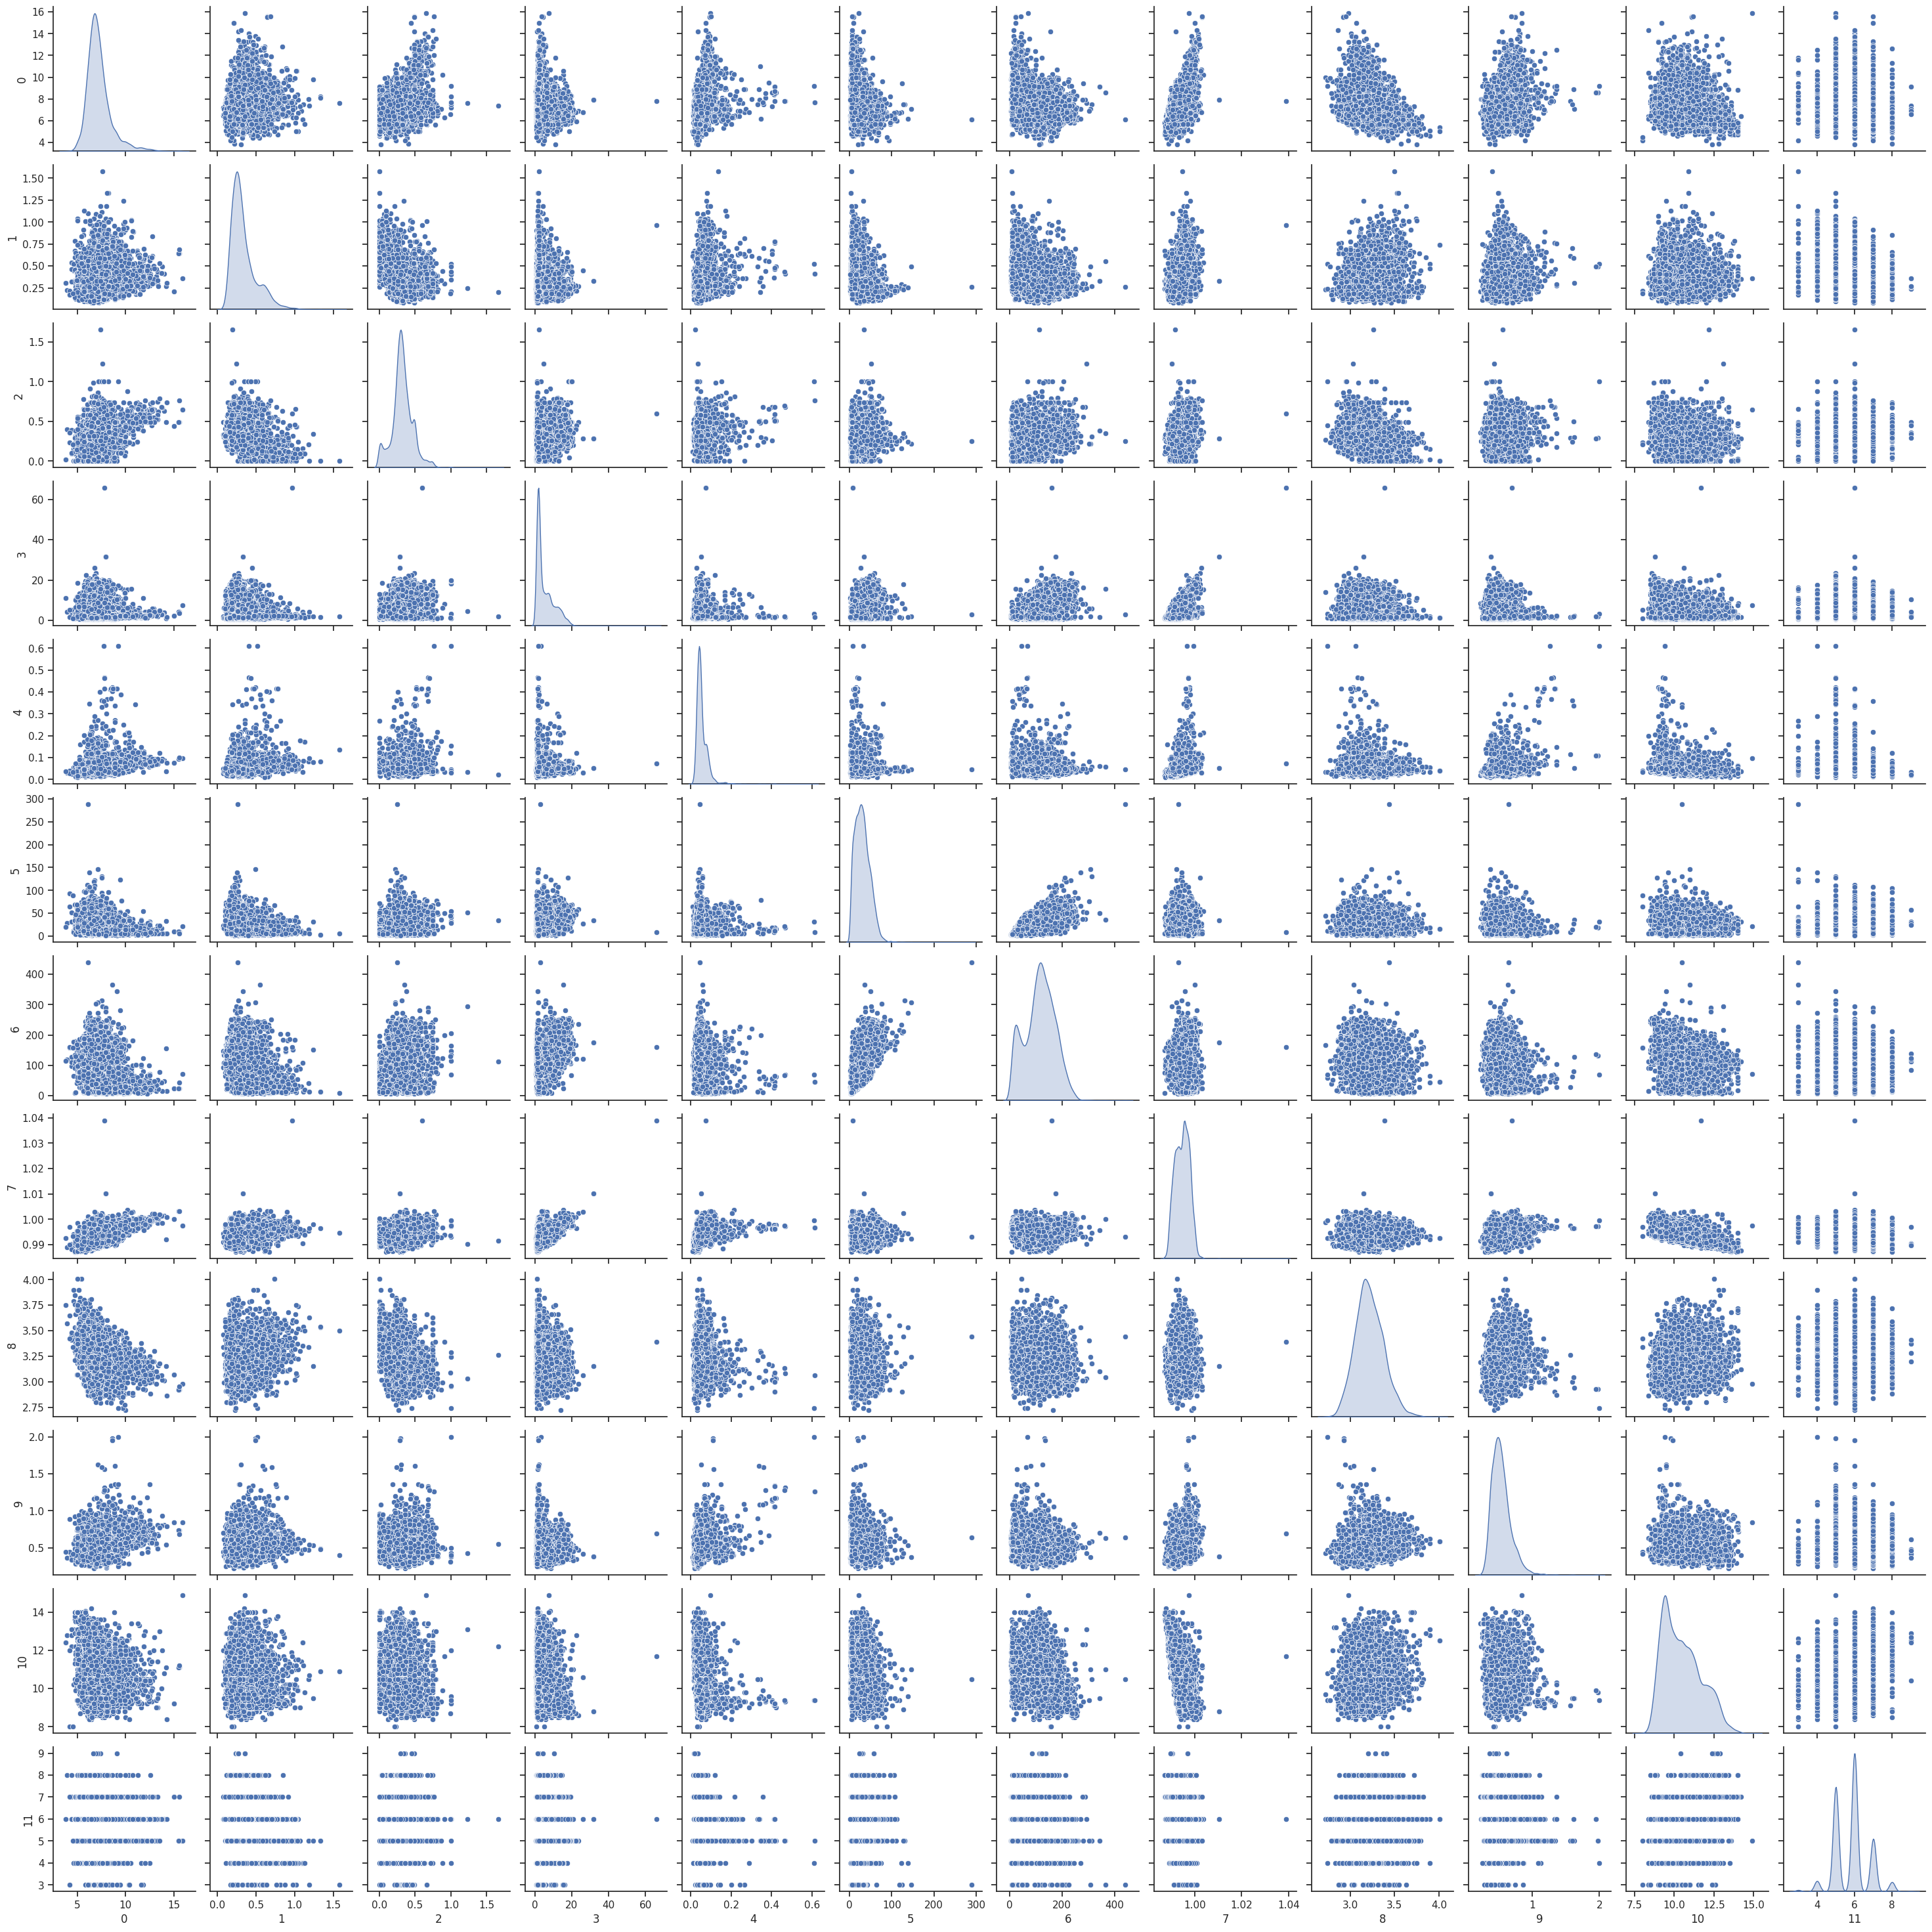

In [80]:
plotting(data = features)

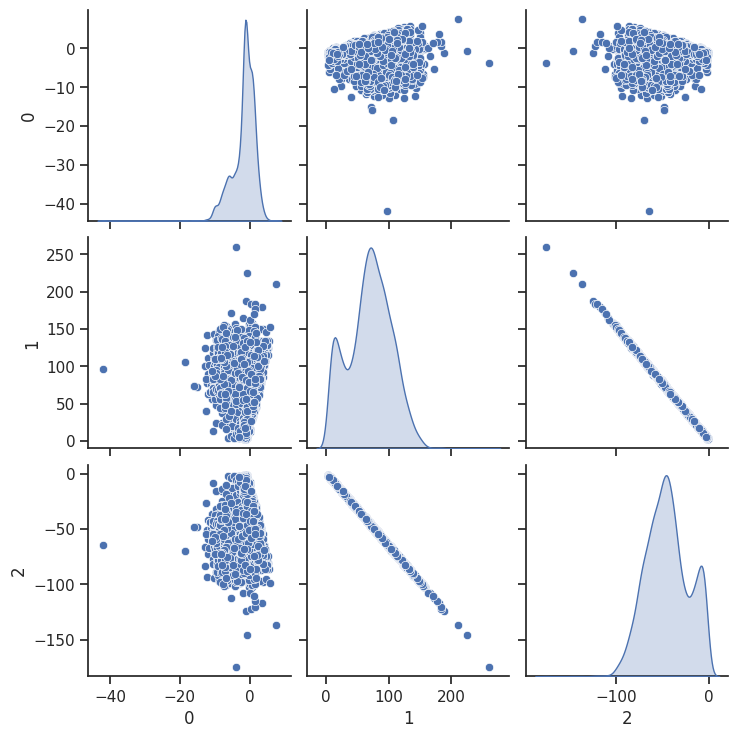

In [82]:
plotting(all_pca)